(absolute-stability-section)=

# Absolute stability

We have seen that a necessary {prf:ref}`condition for stability<stability-definition>` of a method is that the local truncation errors must not grow from one step to the next. A method satisfying this basic condition is considered to be **absolutely stable**. Since the stability function $R(z)$ is expressed using $z=h\lambda$ then a method may be stable for some value of $h$ and unstable for others. This provides the definition for absolute stability.

```{prf:definition} Absolute stability
:label: absolute-stability-definition

A method is considered to be **absolutely stable** if $|R(z)| \leq 1$ for $z\in \mathbb{C}$.
```

Of course, we require our methods to be stable, so it is useful to know for what values of $h$ we have a stable method. This gives the definition of the **region of absolute stability**.

```{prf:definition} Region of absolute stability
:label: region-of-absolute-stability-definition

The **region of absolute stability** is the set of $z\in \mathbb{C}$ for which a method is absolutely stable

$$ \{ z:z\in \mathbb{C},|R(z)|\leq 1 \} $$
```

The region of absolute stability for the Euler method is shown in {numref}`euler-stability-region-figure`.

```{glue:figure} euler_stability_region
:name: euler-stability-region-figure
:figwidth: 600

The region of absolute stability for the Euler method.
```

---

(plot-stability-region-section)=

## Plotting stability regions

We can plot the region of absolute stability by generate a set of points for $z$ in the complex plane and plot the contour where $|R(z)| = 1$ which is the boundary of the stability region. The code for producing a plot of the region of absolute stability of the Euler method using Python is shown below.

`````{tab-set}
````{tab-item} Python
```python
import numpy as np
import matplotlib.pyplot as plt

# Generate z values
xmin, xmax, ymin, ymax = -3, 1, -1.5, 1.5
X, Y = np.meshgrid(np.linspace(xmin, xmax, 200),np.linspace(ymin, ymax, 200))
Z = X + Y * 1j

# Define stability function
R = 1 + Z

# Plot stability region
fig = plt.figure()
contour = plt.contourf(X, Y, abs(R), levels=[0, 1], colors="#99ccff")  # Plot stability region
plt.contour(X, Y, abs(R), colors= "k", levels=[0, 1])                  # Add outline
plt.axhline(0, color="k", linewidth=1)                                 # Add x-axis line
plt.axvline(0, color="k", linewidth=1)                                 # Add y-axis line
plt.axis("equal")
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=12)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=12)
plt.show()
```
````

````{tab-item} MATLAB
```matlab
% Generate z values
xmin = -3;
xmax = 1;
ymin = -1.5;
ymax = 1.5;
[X, Y] = meshgrid(linspace(xmin, xmax, 200), linspace(ymin, ymax, 200));
Z = X + Y * 1i;

% Define stability function 
R = 1 + Z;

% Plot stability region
contourf(X, Y, abs(R), [0, 1], LineWidth=2)
xline(0, LineWidth=2)
yline(0, LineWidth=2)
colormap([153, 204, 255 ; 255, 255, 255] / 255)
axis equal
axis([xmin, xmax, ymin, ymax])
xlabel("$\mathrm{Re}(z)$", FontSize=12, Interpreter="latex")
ylabel("$\mathrm{Im}(z)$", FontSize=12, Interpreter="latex")
```
````
`````

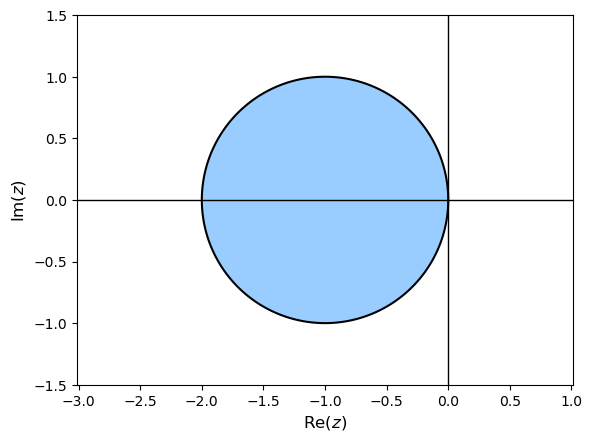

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate z values
xmin, xmax, ymin, ymax = -3, 1, -1.5, 1.5
X, Y = np.meshgrid(np.linspace(xmin, xmax, 200),np.linspace(ymin, ymax, 200))
Z = X + Y * 1j

# Define stability function
R = 1 + Z

# Plot stability region
fig = plt.figure()
contour = plt.contourf(X, Y, abs(R), levels=[0, 1], colors="#99ccff")  # Plot stability region
plt.contour(X, Y, abs(R), colors= "k", levels=[0, 1])                    # Add outline
plt.axhline(0, color="k", linewidth=1)                                   # Add x-axis line
plt.axvline(0, color="k", linewidth=1)                                   # Add y-axis line
plt.axis("equal")
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=12)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=12)
plt.show()

from myst_nb import glue
glue("euler_stability_region", fig, display=False)

(interval-of-absolute-stability-section)=

## Interval of absolute stability

The choice of step length used in a method will depend on accuracy requirements, the computational resources available, the stability properties of the method and the ODE being solved. It is often necessary to use as large a value of the step length as possible permitted by the stability requirements to minimise the computational effort required to solve an ODE. The range values of the step length that can be chosen is governed by the stability region and provides use with the following definition.

````{prf:definition} Interval of absolute stability
:label: interval-of-absolute-stability-definition

The range of real values that the step length $h$ of a method can take that ensures a method remains absolutely stable is known as the **interval of absolute stability**

$$ \begin{align*}
    \{ z : z \in \mathbb{R}, |R(z)| \leq 1 \}
\end{align*} $$

````

The interval of absolute stability for the Euler method can be seen in {numref}`stability-interval-plot-figure`. 

```{glue:figure} stability-interval-plot
:name: stability-interval-plot-figure
:figwidth: 600

Interval of absolute stability for the Euler method.
```

The region of absolute stability for the Euler method shows that the interval of absolute stability for the test ODE $y'=\lambda y$ is

$$ \begin{align*}
    z \in [-2,0],
\end{align*} $$

Since $z = h\lambda$ then

$$ \begin{align*}
    h \in \left[ -\frac{2}{\lambda},0 \right],
\end{align*} $$

so we have the condition

$$ \begin{align*}
    h \leq -\frac{2}{\lambda}.
\end{align*} $$

We saw in {numref}`stability-plot-1-figure` that solving the ODE $y' = -15y$ using $h=0.25$ resulted in an unstable solution whereas using $h=0.125$ resulted in a stable (albeit oscillatory) solution. This is because for this ODE $\lambda = -15$ and the step length for the Euler method must satisfy

$$ \begin{align*}
    h \leq -\frac{2}{-15} = 0.1\dot{3}.
\end{align*} $$

This is why the solution using $h=0.25$ was unstable since $0.25 > 0.1\dot{3}$ and the solution using $h=0.125$ was stable since $0.125 < 0.1\dot{3}$.

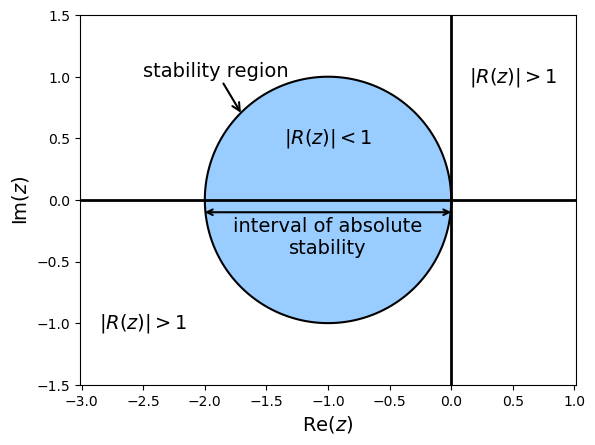

In [2]:
# Plot stability region
fig = plt.figure()
plt.contourf(X, Y, abs(R), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(R), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=2)
plt.axvline(0, color="k", linewidth=2)
plt.axis("equal")
plt.axis([-3, 1, -1.5, 1.5])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.annotate("", xy=(-2, -0.1), xytext=(0, -0.1), arrowprops=dict(arrowstyle="<->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("stability region", xy=(-1+np.cos(0.75*np.pi), np.sin(0.75*np.pi)), xytext=(-2.5, 1), fontsize=14, 
             arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.text(-1, -0.3, "interval of absolute\nstability", fontsize=14, ha="center", va="center")
plt.text(-1, 0.5, "$|R(z)| < 1$", fontsize=14, ha="center", va="center")
plt.text(0.5, 1, "$|R(z)| > 1$", fontsize=14, ha="center", va="center")
plt.text(-2.5, -1, "$|R(z)| > 1$", fontsize=14, ha="center", va="center")
plt.show()

from myst_nb import glue
glue("stability-interval-plot", fig, display=False)

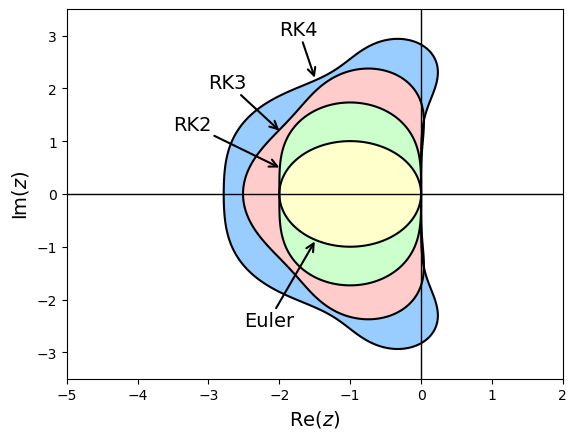

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate z values
xmin, xmax, ymin, ymax = -5, 2, -3.5, 3.5
X, Y = np.meshgrid(np.linspace(xmin, xmax, 200),np.linspace(ymin, ymax, 200))
Z = X + Y * 1j

# Define stability functions
Euler = 1 + Z
RK2 = Euler + Z ** 2 / 2
RK3 = RK2 + Z ** 3 / 6
RK4 = RK3 + Z ** 4 / 24

# Plot stability region
fig = plt.figure()
plt.contourf(X, Y, abs(RK4), levels=[0, 1], colors="#99ccff")    # plot stability regions
plt.contourf(X, Y, abs(RK3), levels=[0, 1], colors="#ffcccc")
plt.contourf(X, Y, abs(RK2), levels=[0, 1], colors="#ccffcc")
plt.contourf(X, Y, abs(Euler), levels=[0, 1], colors="#ffffcc")
plt.contour(X, Y, abs(RK4), colors= "k", levels=[0, 1])          # add outlines
plt.contour(X, Y, abs(RK3), colors= "k", levels=[0, 1])
plt.contour(X, Y, abs(RK2), colors= "k", levels=[0, 1])
plt.contour(X, Y, abs(Euler), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=1)
plt.axvline(0, color="k", linewidth=1)
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.annotate("RK4", xy=(-1.5, 2.2), xytext=(-2, 3), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("RK3", xy=(-2, 1.2), xytext=(-3, 2), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("RK2", xy=(-2, 0.5), xytext=(-3.5, 1.2), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("Euler", xy=(-1.5, -0.9), xytext=(-2.5, -2.5), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.show()

from myst_nb import glue
glue("erk-stability-regions-plot", fig, display=False)

fig.savefig("../_images/ERK_stability.png", dpi=fig.dpi)